# Visualisation des données sur les incidents de sécurité sur le réseau de la SCNF

In [323]:
############ Installation préalable ##############
!pip install pywaffle

     ---------------------------------------- 25.1/25.1 MB 5.6 MB/s eta 0:00:00


In [324]:
############ Importation des modules nécessaires et du jeu de données ##############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  #pour la gestion des dates
from pywaffle import Waffle
url_api="https://ressources.data.sncf.com/api/v2/catalog/datasets/incidents-securite/exports/json?limit=-1&offset=0&lang=fr&timezone=Europe%2FParis"
incident= pd.read_json(url_api)
#incident.head()

In [212]:
######## Retrait des données de 2015 ###########
incident['annee']=incident['date'].dt.strftime('%Y')
incident2=incident.drop(incident[incident['annee']=="2015"].index, inplace=False)

## En moyenne, sur la période de 2016 à 2022, quelles sont les régions dans lesquelles les incidents sont les plus graves? 

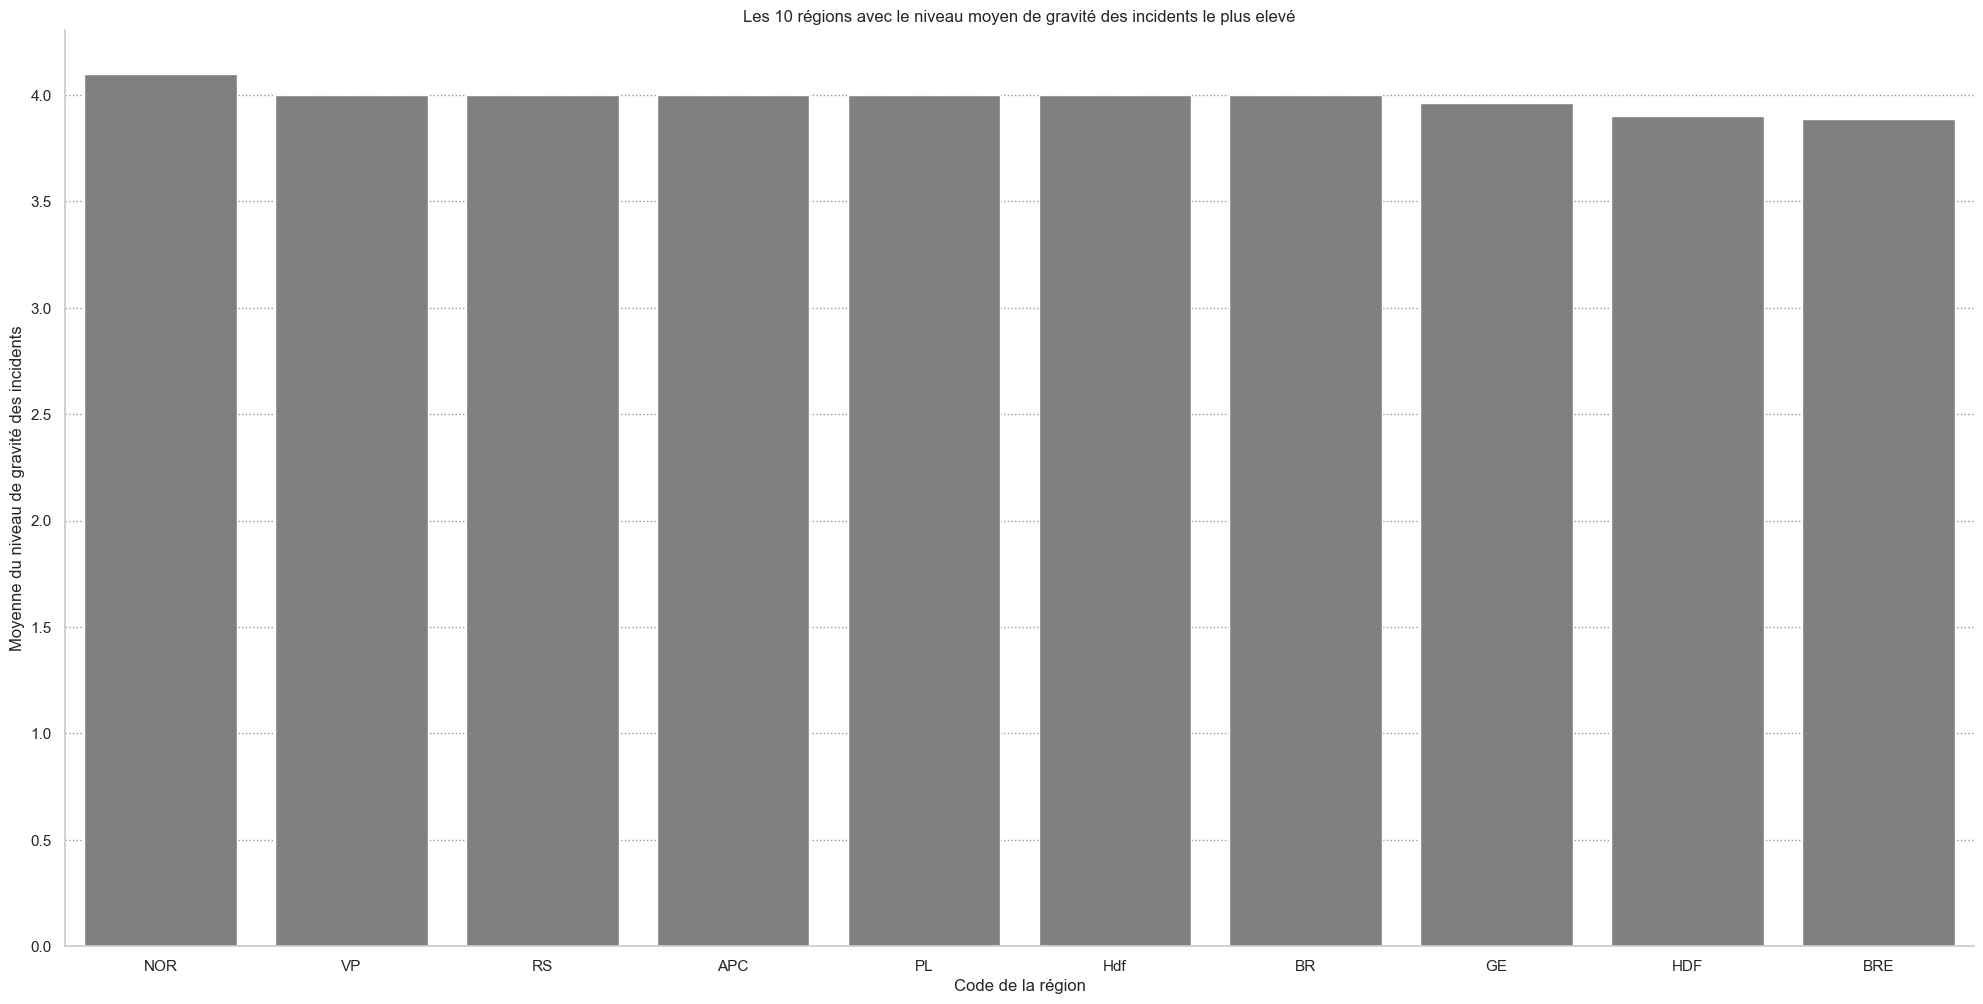

In [213]:
df1=incident2.groupby('region').agg({'niveau_gravite': "mean"}).sort_values('niveau_gravite', ascending = False).head(10)
df1=df1.reset_index()
#sns.set(style="darkgrid")
g = sns.catplot(x='region', y='niveau_gravite', data=df1, kind = "bar", height = 10, aspect = 2, color='gray')
g.set_axis_labels('Code de la région', 'Moyenne du niveau de gravité des incidents')
plt.title('Les 10 régions avec le niveau moyen de gravité des incidents le plus elevé')
plt.show()

## Comment sont répartis les incidents survenus par année?

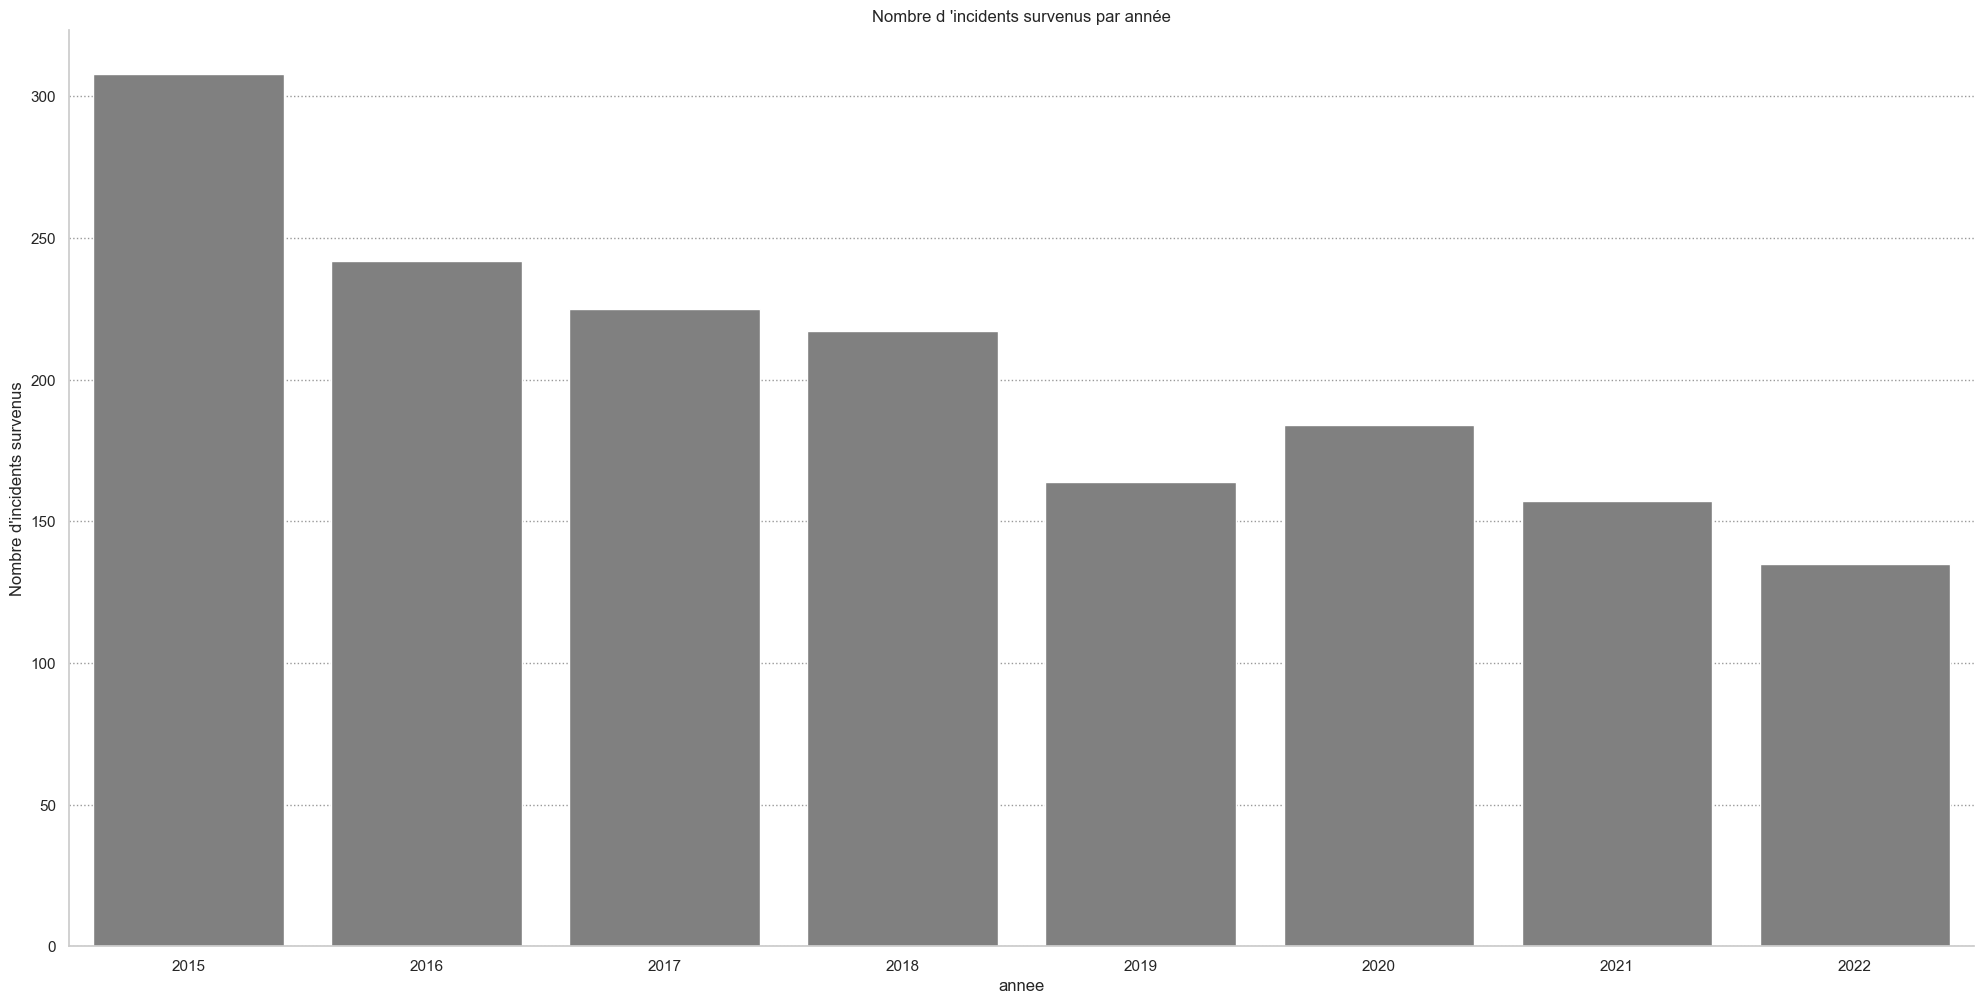

In [214]:
df2=incident.groupby('annee').agg({'annee': "count"})
df2.rename(columns = {'annee':'occurence'}, inplace = True)
df2=df2.reset_index()
g1 = sns.catplot(x='annee', y='occurence', data=df2, kind = "bar", height = 10, aspect = 2, color='gray')
g1.set_axis_labels('annee', 'Nombre d\'incidents survenus')
plt.title('Nombre d \'incidents survenus par année')
plt.show()

## Evolution du niveau de gravité moyen des incidents survenus depuis 2016

Text(0, 0.5, 'Niveau de gravité moyen')

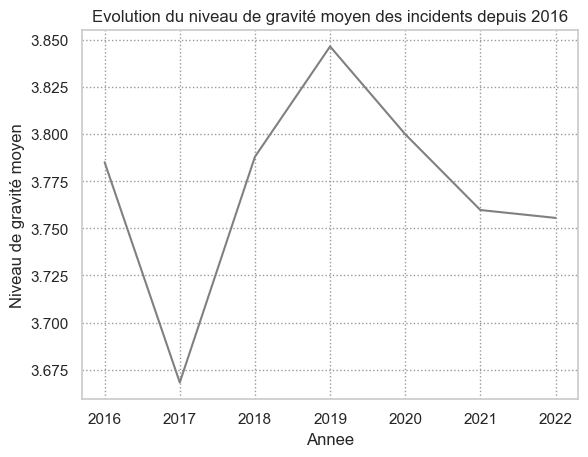

In [286]:
df3=incident2.groupby('annee').agg({'niveau_gravite': "mean"})
df3=df3.reset_index()
sns.set_style("whitegrid",{"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(df3['annee'], df3['niveau_gravite'], "gray")
plt.title('Evolution du niveau de gravité moyen des incidents depuis 2016')
plt.xlabel('Annee')
plt.ylabel('Niveau de gravité moyen')

## Quels sont les types d'incidents qui surviennent le plus souvent?

In [295]:
df4=incident.groupby('type_event').agg({'type_event': "count"})
df4.rename(columns = {'type_event':'nb_occurence'}, inplace = True)
df4=df4.sort_values('nb_occurence', ascending = False).head(10)
df4

,nb_occurence
type_event,
Franchissement intempestif d'un signal d'arrêt fermé,183
Défaillance voie,175
Dépassement de la vitesse limite de plus de 40 km/h,155
Expédition d'un train sans ordre écrit de restriction de vitesse,130
Incident grave de signalisation,124
RFC,90
Portes ouvertes sur train de voyageurs en circulation,78
Déraillement,75
Incendie à bord d’un train,64


## Comment évoluent les occurences de ces types d'incidents dans le temps?

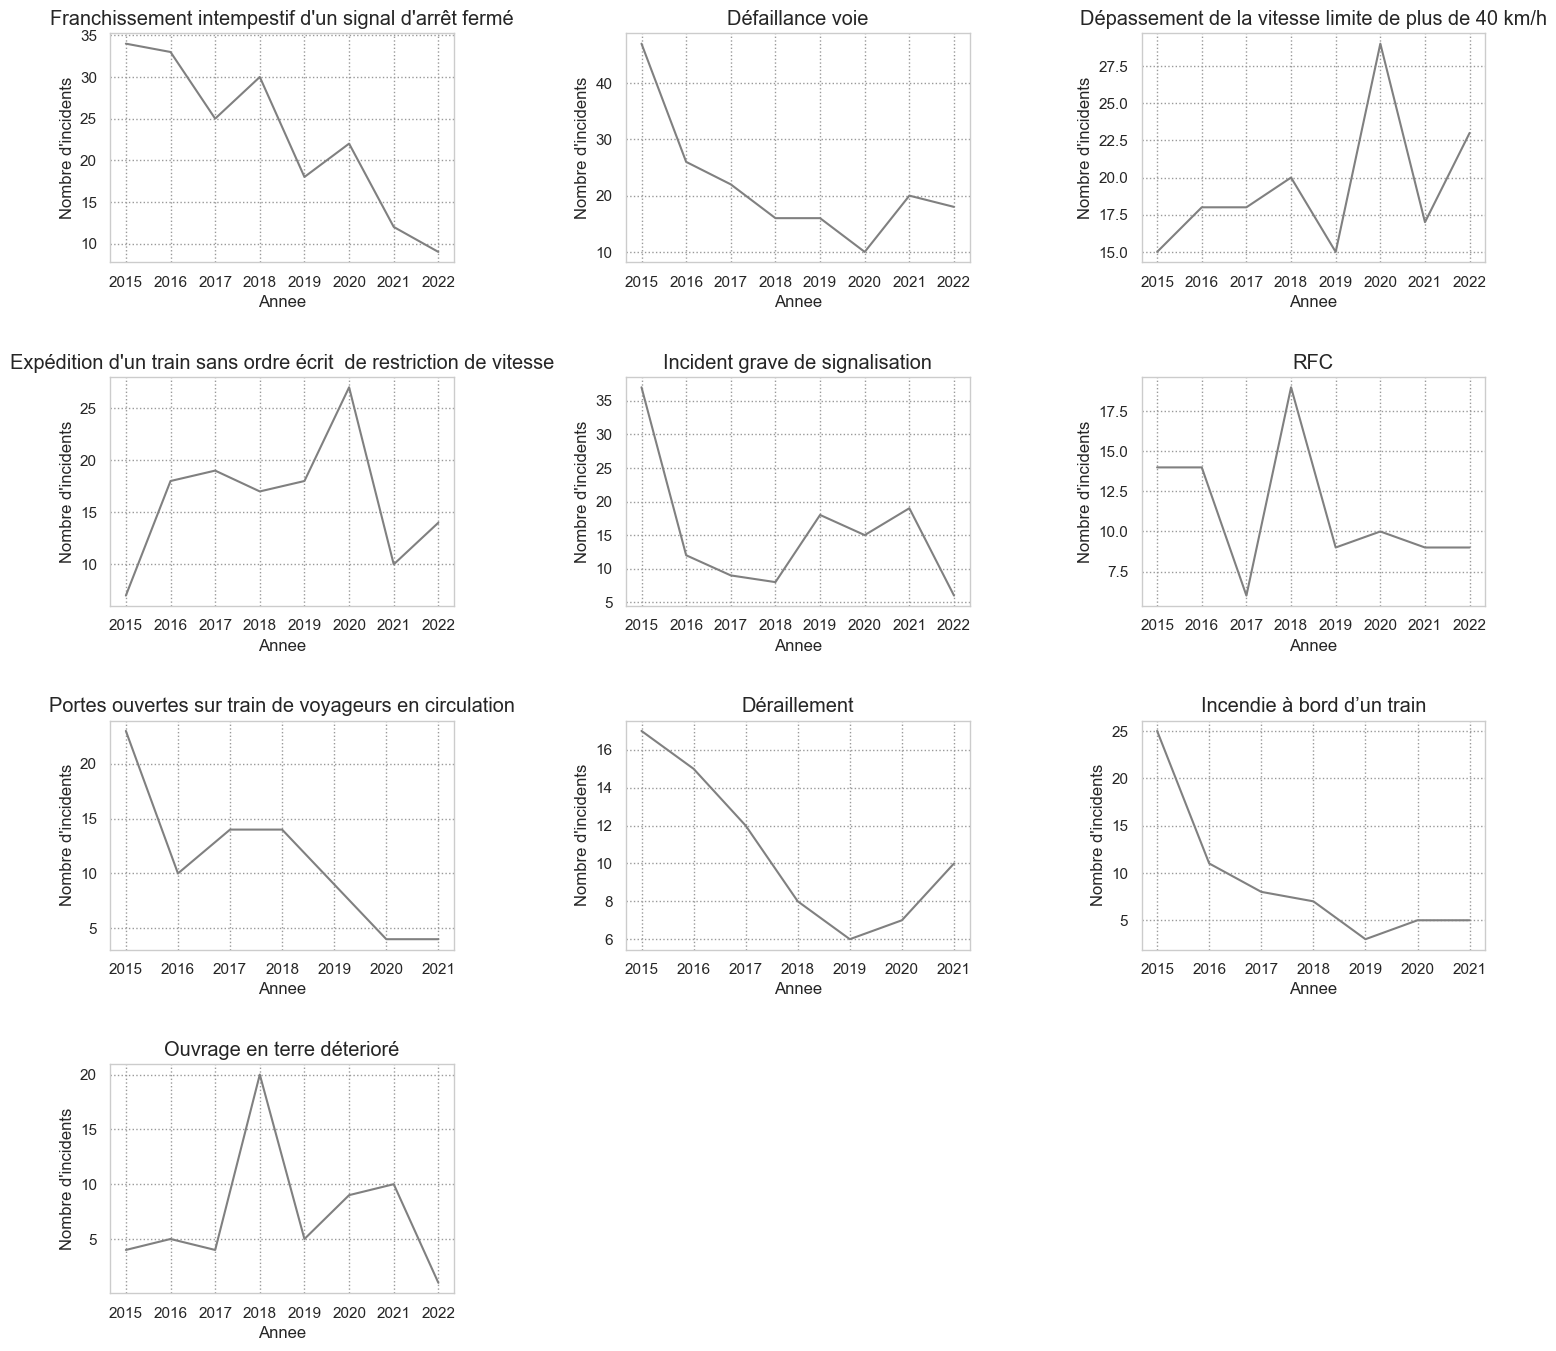

In [320]:
freq_event=np.array(df4.index)
plt.figure(1,figsize=(10,18))
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5,top = 0.9, wspace = 0.5, hspace = 0.5)
for i in range(len(freq_event)):
    plt.subplot(4,3,i+1)
    df=incident[incident['type_event']==freq_event[i]].groupby('annee').agg({'type_event':"count"})
    plt.plot(df.index, df['type_event'], "gray")
    plt.xlabel('Annee')
    plt.ylabel('Nombre d\'incidents')
    plt.title(freq_event[i])

## Mais quelles sont les origines de tous ces incidents de sécurité survenus sur le réseau de la SNCF?🤔

Text(0.5, 1.0, 'Origines des incidents')

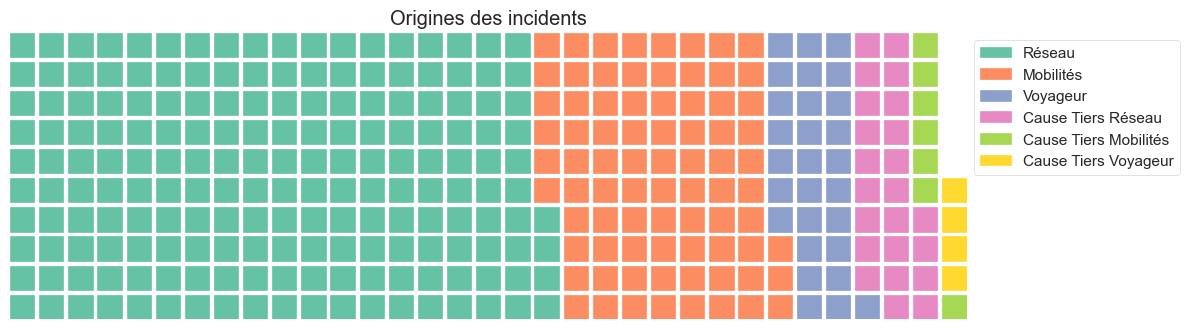

In [331]:
df=incident.groupby('origine').agg({'origine': "count"})
df.rename(columns = {'origine':'nb_occurence'}, inplace = True)
df=df.sort_values('nb_occurence', ascending = False)
df=df.head(6)
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=list(df.nb_occurence/5),
    labels=list(df.index),
    figsize=(12, 8),
    legend={'bbox_to_anchor': (1,1)}
)
plt.title('Origines des incidents')